<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/ProjectPart5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 5



I will need my Gauss-Jordan algorithm from project part 4 so I will copy that code here.

In [18]:
import math
import numpy as np
import scipy.linalg as la

def addRows(matrix,targetRow, modifierRow, value):
  newRow = matrix[targetRow,:]+value*matrix[modifierRow,:]
  newMatrix = []
  for i in range(len(matrix)):
    if i != targetRow:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newRow)
  return np.array(newMatrix)


def changeToLeadingOne(matrix,row,column):
  newMatrix =[]
  for i in range(len(matrix)):
    if i != row:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(1/matrix[row,column]*matrix[row,:])
  return np.array(newMatrix)


def gaussJordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = changeToLeadingOne(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix

## Direct Method

To solve the direct method interpolation, we simply as that for $n+1$ points, we create an $n$ order polynomial that goes through those points.  So we are looking for a function, $f(x)$ in the form,
$$
f(x) = a_0+a_1x+a_2x^2+\cdots + a_n x^n
$$

If we are given a points $(x_0,y_0)$ we ask that 
$$
a_0+a_1x_0+a_2 x_0^2+\cdots +a_n x_0^n = y_0
$$

So we need to find a family of $a_i$'s that solve that equation, that actually solve the system 

$$
\left[
\begin{array}{ccccc|c}
1&x_0&x_0^2&\cdots&x_0^n&y_0\\
\vdots&&\ddots&&\vdots\\
1&x_{n-1}&x_{n-1}^2&\dots& x_{n-1}^n&y_{n-1}
\end{array}
\right]
$$

In [8]:
def createRow(input,output,orderOfPolynomial):
  array = []
  for i in range(orderOfPolynomial+1):
    array.append(input**i)
  array.append(output)
  return array

In [10]:
createRow(2,5,6)

[1, 2, 4, 8, 16, 32, 64, 5]

I will use the points $(2,5)$, $(1,6)$, $(3,7)$ and $(8,1)$.

In [13]:
data =[[2,5],[1,6],[3,7],[8,1]]

4

In [16]:
def createAugmentedMatrix(dataAsArray):
  matrix = []
  order = len(dataAsArray)-1
  for i in range(len(dataAsArray)):
    matrix.append(createRow(dataAsArray[i][0],dataAsArray[i][1],order))
  return np.array(matrix)





In [19]:
createAugmentedMatrix(data)

array([[  1,   2,   4,   8,   5],
       [  1,   1,   1,   1,   6],
       [  1,   3,   9,  27,   7],
       [  1,   8,  64, 512,   1]])

In [45]:
gaussJordan(createAugmentedMatrix(data))[:,-1]

string = ''
for i in range(len(gaussJordan(createAugmentedMatrix(data))[:,-1])):
  coef = gaussJordan(createAugmentedMatrix(data))[i,-1]
  string = string + '+{}'.format(coef) +r'x^{}'.format(i)

string

#Not very beautiful...  Can you do better?

'+11.742857142857144x^0+-8.695238095238096x^1+3.242857142857143x^2+-0.2904761904761905x^3'

In [26]:
def directSpline(dataAsArray, variable):
  coefficients = gaussJordan(createAugmentedMatrix(data))[:,-1]
  value = 0
  for i in range(len(coefficients)):
    value = value + coefficients[i]*variable**i
  return value


In [29]:
directSpline(data,2)


4.999999999999998

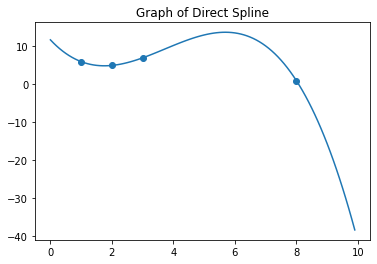

In [46]:
import matplotlib.pyplot as plt


x = np.arange( 0,10,.1)
plt.scatter(np.array(data)[:,0],np.array(data)[:,1])
plt.plot(x,directSpline(data,x))
#plt.plot(x, np.sin(x))
plt.title('Graph of Direct Spline')


plt.show()

Looks pretty good.  I would love to display the equation on the graph too but haven't quite got that part of my code to work.

##Quadratic Splines